In [124]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#### perform Some EDA On the dataset

In [125]:
df = pd.read_csv("content_based_recommendation_dataset.csv")
df.head()


,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.1,300,No,summer,coastal,0.1
4,18,5,4.7,male,2000,4.3,Wakefit,0.9,700,Yes,winter,plains,0.8


In [126]:
df.shape

(1474, 13)

In [127]:
df.columns

Index(['Number of clicks on similar products',
       'Number of similar products purchased so far',
       'Average rating given to similar products', 'Gender',
       'Median purchasing price (in rupees)', 'Rating of the product',
       'Brand of the product', 'Customer review sentiment score (overall)',
       'Price of the product', 'Holiday', 'Season', 'Geographical locations',
       'Probability for the product to be recommended to the person'],
      dtype='object')

### Creating user_id and prodoct_id for ease 

In [128]:
df['product_id'] = df.index

# Assign a user_id to each row (treating each row as a unique user)
df['user_id'] = range(1, len(df) + 1)

df = df[["user_id","product_id","Number of clicks on similar products","Number of similar products purchased so far" , "Rating of the product" , "Gender" , "Median purchasing price (in rupees)" ,  "Price of the product" , "Holiday" , "Season" , "Probability for the product to be recommended to the person"]]

In [129]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Season,Probability for the product to be recommended to the person
0,1,0,12,4,4.5,male,500,200,No,winter,0.9
1,2,1,8,2,3.2,female,3000,300,Yes,monsoon,0.2
2,3,2,25,10,4.8,female,600,1000,No,spring,0.7
3,4,3,6,1,2.5,female,100,300,No,summer,0.1
4,5,4,18,5,4.3,male,2000,700,Yes,winter,0.8


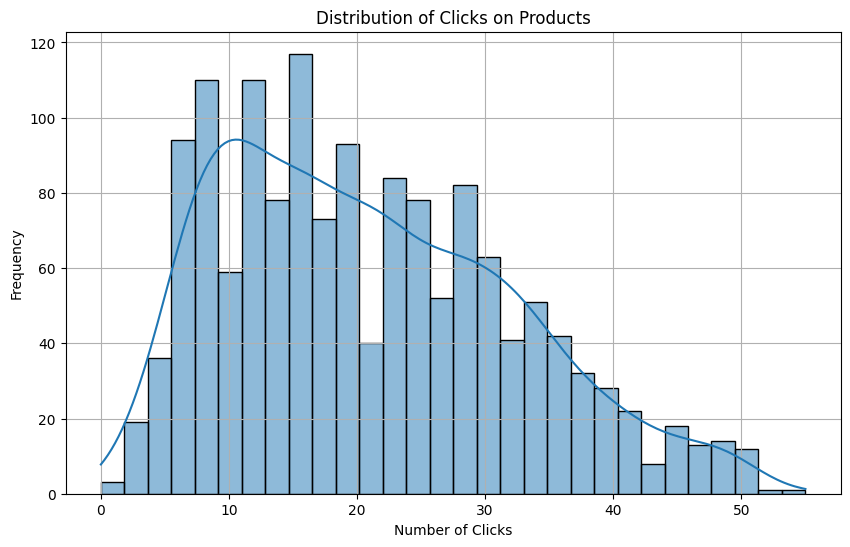

In [130]:
# Visualization: Distribution of Clicks on Products
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of clicks on similar products'], bins=30, kde=True)
plt.title('Distribution of Clicks on Products')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.grid()
plt.show()


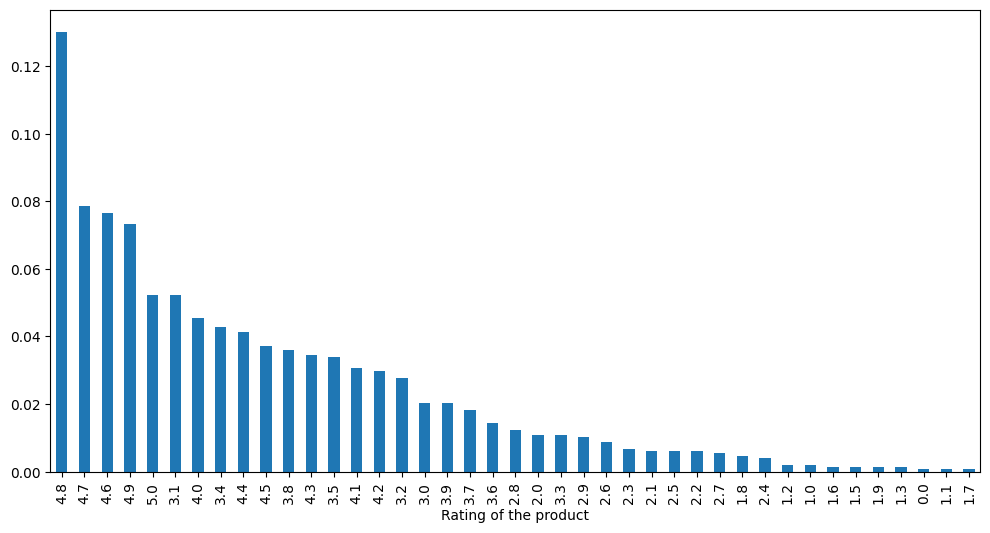

In [131]:
plt.figure(figsize = (12,6))
df['Rating of the product'].value_counts(1).plot(kind='bar')
plt.show()

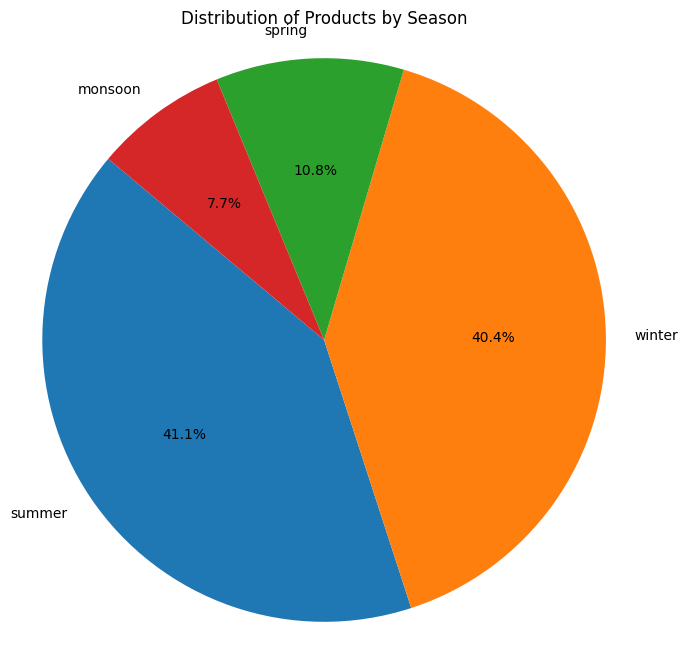

In [132]:
# Visualization: Pie Chart for Season Distribution
season_counts = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

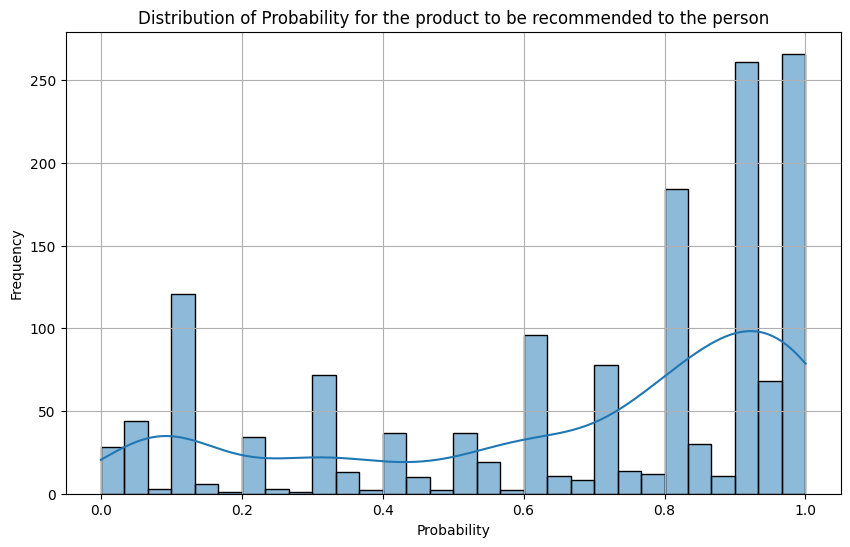

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Probability for the product to be recommended to the person'].astype(float), bins=30, kde=True)
plt.title('Distribution of Probability for the product to be recommended to the person')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()




In [134]:
df.isnull().sum()

user_id                                                        0
product_id                                                     0
Number of clicks on similar products                           0
Number of similar products purchased so far                    0
Rating of the product                                          0
Gender                                                         0
Median purchasing price (in rupees)                            0
Price of the product                                           0
Holiday                                                        0
Season                                                         0
Probability for the product to be recommended to the person    0
dtype: int64

In [135]:
df['price_difference'] = df['Median purchasing price (in rupees)'] - df['Price of the product']
df['click_rating_ratio'] = df['Number of clicks on similar products'] / df['Rating of the product']
df['discount_ratio'] = df['Price of the product'] / df['Median purchasing price (in rupees)']



In [136]:
# Label Encoding
replacement_mapping = {
    "male" : 1,
    "female" : 0,
    "Yes" : 1,
    "No" : 0
}

df["Gender"] = df["Gender"].replace(replacement_mapping)
df["Holiday"] = df["Holiday"].replace(replacement_mapping)

C:\Users\Ojshav\AppData\Local\Temp\ipykernel_23208\2607334510.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace(replacement_mapping)
C:\Users\Ojshav\AppData\Local\Temp\ipykernel_23208\2607334510.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Holiday"] = df["Holiday"].replace(replacement_mapping)


In [137]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Season,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio
0,1,0,12,4,4.5,1,500,200,0,winter,0.9,300,2.666667,0.400000
1,2,1,8,2,3.2,0,3000,300,1,monsoon,0.2,2700,2.500000,0.100000
2,3,2,25,10,4.8,0,600,1000,0,spring,0.7,-400,5.208333,1.666667
3,4,3,6,1,2.5,0,100,300,0,summer,0.1,-200,2.400000,3.000000
4,5,4,18,5,4.3,1,2000,700,1,winter,0.8,1300,4.186047,0.350000


In [138]:
# One Hot Encoding on Season

one_hot_encoded = pd.get_dummies(df['Season'], prefix='')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop("Season", axis=1, inplace=True)

In [139]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter
0,1,0,12,4,4.5,1,500,200,0,0.9,300,2.666667,0.400000,0,0,0,1
1,2,1,8,2,3.2,0,3000,300,1,0.2,2700,2.500000,0.100000,1,0,0,0
2,3,2,25,10,4.8,0,600,1000,0,0.7,-400,5.208333,1.666667,0,1,0,0
3,4,3,6,1,2.5,0,100,300,0,0.1,-200,2.400000,3.000000,0,0,1,0
4,5,4,18,5,4.3,1,2000,700,1,0.8,1300,4.186047,0.350000,0,0,0,1


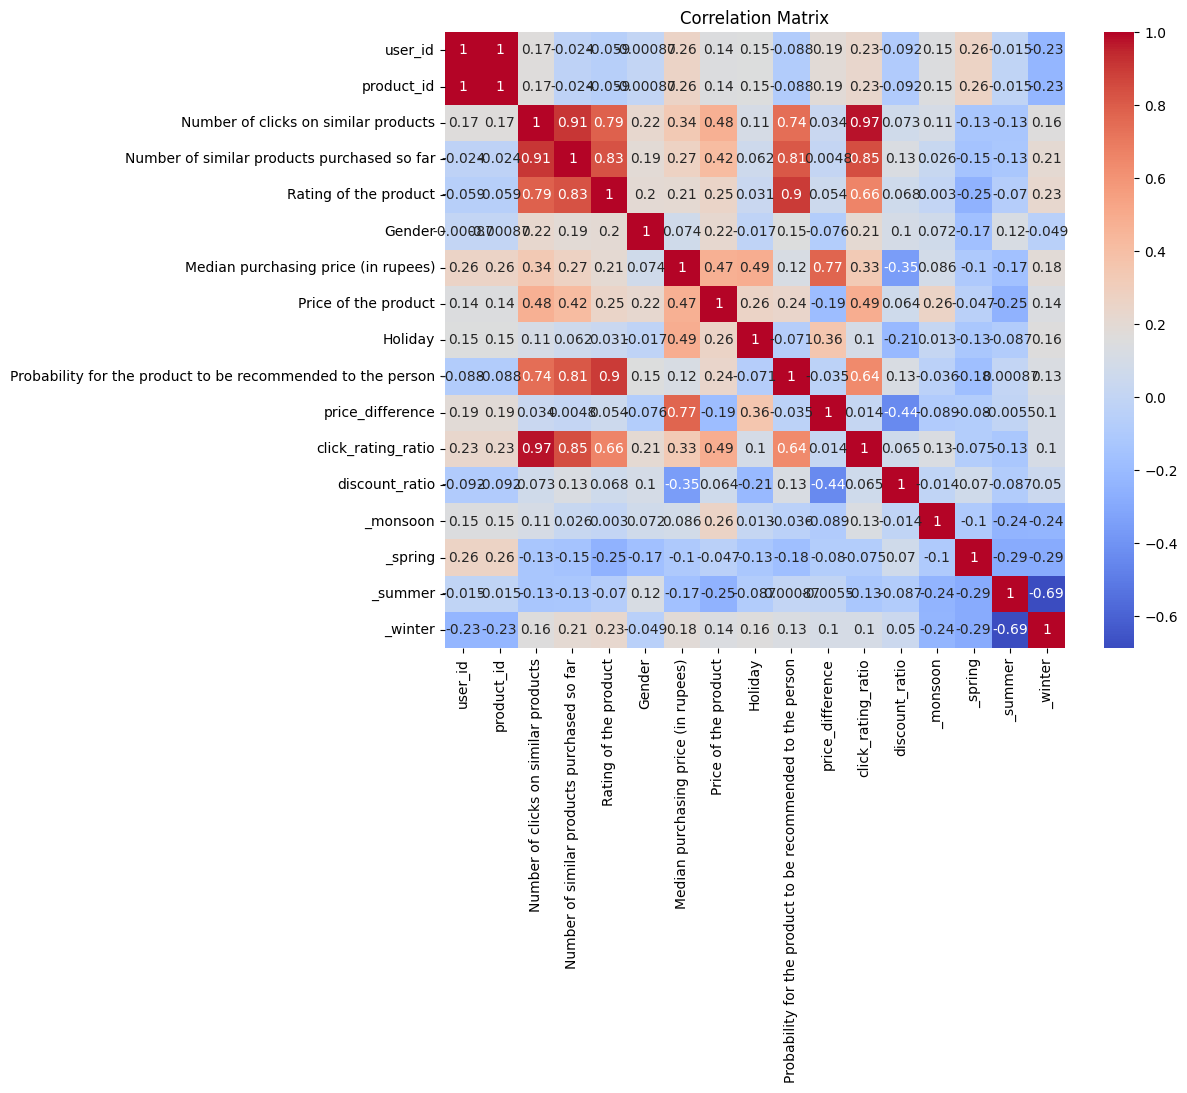

In [140]:
# Visualization: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Content Based Filtering

In [141]:
# Features and target variable
X = df.drop(columns=["user_id", "product_id", "Probability for the product to be recommended to the person"])
y = df["Probability for the product to be recommended to the person"]

In [142]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Build the pipeline
model_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Normalize the features
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0048
R² Score: 0.9596


In [145]:
# Add predictions to test set
X_test["Predicted_Probability"] = y_pred

# Sort by predicted probability
recommendations = X_test.sort_values(by="Predicted_Probability", ascending=False)
recommendations


,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter,Predicted_Probability
629,32,17,5.0,0,700,900,0,-200,6.400000,1.285714,0,0,0,1,1.00000
184,31,15,4.8,0,600,700,0,-100,6.458333,1.166667,0,0,0,1,1.00000
277,27,13,4.8,1,1000,800,0,200,5.625000,0.800000,0,0,1,0,1.00000
196,25,13,4.7,0,300,800,0,-500,5.319149,2.666667,0,0,0,1,1.00000
423,34,17,5.0,0,7000,900,1,6100,6.800000,0.128571,0,0,0,1,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3,0,1.8,0,100,200,0,-100,1.666667,2.000000,0,0,1,0,0.03680
1169,7,1,1.3,0,4000,500,0,3500,5.384615,0.125000,0,0,1,0,0.02675
873,3,1,1.3,0,100,100,0,0,2.307692,1.000000,0,0,1,0,0.02500
844,2,0,1.0,0,100,100,0,0,2.000000,1.000000,0,0,1,0,0.00890


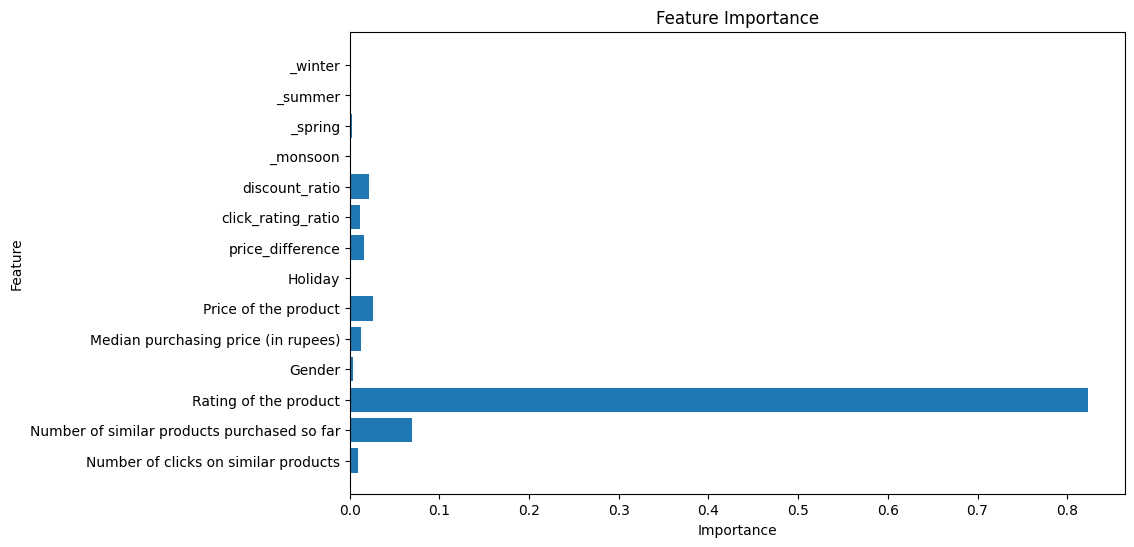

In [146]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model_pipeline.named_steps["regressor"].feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Rank based Filtering

In [147]:
data  = df.copy()
def rank_based_filtering(new_user_preferences, df):
    # Calculate scores based on user preferences
    data['score'] = (data['Number of clicks on similar products'] * new_user_preferences['click_weight'] +
                   data['Number of similar products purchased so far'] * new_user_preferences['purchase_weight'] +
                   data['Rating of the product'] * new_user_preferences['rating_weight'] +
                   data['Price of the product'].apply(lambda x: new_user_preferences['price_weight'] / (x + 1)))  # Avoid division by zero

    # Rank products based on the calculated score
    data['rank'] = data['score'].rank(ascending=False)

    # Return the top N recommended products
    return data.sort_values(by='rank').head(new_user_preferences['top_n'])


### We can came up with a function to calculate the user preference

In [148]:
new_user_preferences = {
    'click_weight': 0.4,
    'purchase_weight': 0.3,
    'rating_weight': 0.2,
    'price_weight': 0.1,
    'top_n': 5
}

recommended_products = rank_based_filtering(new_user_preferences, data)
recommended_products

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter,score,rank
1231,1232,1231,55,22,4.9,1,1100,1500,1,1.0,-400,11.224490,1.363636,0,1,0,0,29.580067,1.0
1239,1240,1239,50,24,4.9,0,10500,1300,1,1.0,9200,10.204082,0.123810,0,1,0,0,28.180077,2.0
1216,1217,1216,53,18,4.9,1,3500,1000,1,0.9,2500,10.816327,0.285714,0,0,1,0,27.580100,3.0
1204,1205,1204,50,21,4.9,1,1000,1400,1,1.0,-400,10.204082,1.400000,0,1,0,0,27.280071,4.0
1212,1213,1212,48,23,4.9,0,10000,1200,1,1.0,8800,9.795918,0.120000,0,1,0,0,27.080083,5.0


### Build a Hybrid Recommendation System

In [149]:
from sklearn.preprocessing import MinMaxScaler
# Normalize content-based features
scaler = MinMaxScaler()
data[["Number of clicks on similar products", "Number of similar products purchased so far", 
      "Rating of the product", "Median purchasing price (in rupees)", "Price of the product"]] = scaler.fit_transform(
    data[["Number of clicks on similar products", "Number of similar products purchased so far", 
          "Rating of the product", "Median purchasing price (in rupees)", "Price of the product"]]
)

In [150]:
# Compute content-based similarity score
data["content_score"] = (
    0.4 * data["Rating of the product"] +
    0.3 * data["Median purchasing price (in rupees)"] +
    0.3 * data["Price of the product"]
)

# Compute behavioral preference score
data["behavioral_score"] = (
    0.5 * data["Number of clicks on similar products"] +
    0.5 * data["Number of similar products purchased so far"]
)

# Combine scores into a hybrid score
data["hybrid_score"] = 0.6 * data["content_score"] + 0.4 * data["behavioral_score"]


In [151]:
# Sort recommendations by hybrid score
data = data.sort_values(by="hybrid_score", ascending=False)

# Display recommendations
print(data[["user_id", "product_id", "hybrid_score"]])

data.head()


     user_id  product_id  hybrid_score
972      973         972      0.857971
900      901         900      0.857971
992      993         992      0.857971
998      999         998      0.857971
936      937         936      0.857971
..       ...         ...           ...
877      878         877      0.060254
844      845         844      0.055454
817      818         817      0.051818
832      833         832      0.051818
5          6           5      0.025100

[1474 rows x 3 columns]


,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,...,discount_ratio,_monsoon,_spring,_summer,_winter,score,rank,content_score,behavioral_score,hybrid_score
972,973,972,0.909091,0.833333,0.98,1,0.52381,1.0,1,1.0,...,1.0,0,0,0,1,26.98001,9.5,0.849143,0.871212,0.857971
900,901,900,0.909091,0.833333,0.98,1,0.52381,1.0,1,1.0,...,1.0,0,0,0,1,26.98001,9.5,0.849143,0.871212,0.857971
992,993,992,0.909091,0.833333,0.98,1,0.52381,1.0,1,1.0,...,1.0,0,0,0,1,26.98001,9.5,0.849143,0.871212,0.857971
998,999,998,0.909091,0.833333,0.98,1,0.52381,1.0,1,1.0,...,1.0,0,0,0,1,26.98001,9.5,0.849143,0.871212,0.857971
936,937,936,0.909091,0.833333,0.98,1,0.52381,1.0,1,1.0,...,1.0,0,0,0,1,26.98001,9.5,0.849143,0.871212,0.857971


In [152]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter
0,1,0,12,4,4.5,1,500,200,0,0.9,300,2.666667,0.400000,0,0,0,1
1,2,1,8,2,3.2,0,3000,300,1,0.2,2700,2.500000,0.100000,1,0,0,0
2,3,2,25,10,4.8,0,600,1000,0,0.7,-400,5.208333,1.666667,0,1,0,0
3,4,3,6,1,2.5,0,100,300,0,0.1,-200,2.400000,3.000000,0,0,1,0
4,5,4,18,5,4.3,1,2000,700,1,0.8,1300,4.186047,0.350000,0,0,0,1


In [153]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
columns_to_scale = ['Median purchasing price (in rupees)', 'Price of the product']

scaler = StandardScaler()
for target_column in columns_to_scale:
    scaled_data = scaler.fit_transform(df[[target_column]])
    scaled_df = pd.DataFrame(scaled_data, columns=[target_column])
    scaled_df.reset_index(inplace = True)
    df[target_column] = scaled_df[target_column]

In [154]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter
0,1,0,12,4,4.5,1,-0.729190,-0.480978,0,0.9,300,2.666667,0.400000,0,0,0,1
1,2,1,8,2,3.2,0,0.091865,-0.429968,1,0.2,2700,2.500000,0.100000,1,0,0,0
2,3,2,25,10,4.8,0,-0.696348,-0.072898,0,0.7,-400,5.208333,1.666667,0,1,0,0
3,4,3,6,1,2.5,0,-0.860559,-0.429968,0,0.1,-200,2.400000,3.000000,0,0,1,0
4,5,4,18,5,4.3,1,-0.236557,-0.225928,1,0.8,1300,4.186047,0.350000,0,0,0,1


## Cluster Technique

In [162]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

df.isnull().sum()

df.fillna(0.0,inplace=True)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(df)

# Analyze clusters to derive weights
weights = {}
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    # Calculate mean of each feature in the cluster
    mean_values = cluster_data.mean()
    weights[cluster] = mean_values / mean_values.sum()  # Normalize to get weights

# Convert weights to a DataFrame for easier access
weights_df = pd.DataFrame(weights).T
weights_df.columns = df.columns  # Set feature names as columns
print(weights_df)

# Example of using the derived weights in the recommendation engine
# Assuming you want to use the weights of the first cluster
selected_weights = weights_df.iloc[0]



    user_id  product_id  Number of clicks on similar products  \
0  0.450937    0.450298                              0.013531   
2  0.129961    0.129778                              0.003005   
1  0.103729    0.103629                              0.002721   

   Number of similar products purchased so far  Rating of the product  \
0                                     0.006051               0.002602   
2                                     0.001276               0.000692   
1                                     0.001188               0.000454   

     Gender  Median purchasing price (in rupees)  Price of the product  \
0  0.000338                            -0.000272              0.000055   
2  0.000083                             0.000113             -0.000050   
1  0.000050                             0.000199             -0.000012   

    Holiday  Probability for the product to be recommended to the person  \
0  0.000185                                           0.000449           

In [163]:
weights_df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,price_difference,click_rating_ratio,discount_ratio,_monsoon,_spring,_summer,_winter,cluster
0,0.450937,0.450298,0.013531,0.006051,0.002602,0.000338,-0.000272,0.000055,0.000185,0.000449,0.071203,0.003157,0.000827,0.000057,0.000083,0.000268,0.000231,0.000000
2,0.129961,0.129778,0.003005,0.001276,0.000692,0.000083,0.000113,-0.000050,0.000134,0.000089,0.733602,0.000741,0.000025,0.000011,0.000003,0.000071,0.000098,0.000367
1,0.103729,0.103629,0.002721,0.001188,0.000454,0.000050,0.000199,-0.000012,0.000071,0.000084,0.787085,0.000589,0.000011,0.000001,0.000012,0.000040,0.000048,0.000101


In [164]:

df['final_rating'] = (df['Number of clicks on similar products'] * selected_weights['Number of clicks on similar products'] +
                      df['Number of similar products purchased so far'] * selected_weights['Number of similar products purchased so far'] +
                      df['Rating of the product'] * selected_weights['Rating of the product'] +
                      df['Probability for the product to be recommended to the person'] * selected_weights['Probability for the product to be recommended to the person'] +
                      df['Price of the product'] * selected_weights['Price of the product'] +
                      df['Gender'] * selected_weights['Gender'] +
                      df['Median purchasing price (in rupees)'] * selected_weights['Median purchasing price (in rupees)'] +
                      df['_monsoon'] * selected_weights['_monsoon'] +
                      df['_spring'] * selected_weights['_spring'] +
                      df['_summer'] * selected_weights['_summer'] +
                      df['_winter'] * selected_weights['_winter'])

# Create a user-product interaction matrix based on the final rating
user_product_matrix = df.pivot_table(index='user_id', columns='product_id', values='final_rating')



In [165]:
user_product_matrix.head()

product_id,0,1,2,3,4,5,6,7,8,9,...,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.199433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.128778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.411864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.094267,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.285986,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
user_product_matrix.fillna(0.0, inplace=True)
user_product_matrix.head(10)

product_id,0,1,2,3,4,5,6,7,8,9,...,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.199433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.128778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.411864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.094267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.285986,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000718,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.618587,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122993,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059368,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
num_users = user_product_matrix.index.nunique()  # Number of unique users
num_products = user_product_matrix.columns.nunique()  # Number of unique products
print(num_users)
print(num_products)

1474
1474


In [156]:

# Finding the number of non-zero entries in the interaction matrix
non_zero_entries = user_product_matrix.count().sum()  # Count non-null entries
print(f'Number of non-zero entries in the interaction matrix: {non_zero_entries}')

# Finding the possible number of ratings as per the number of users and products

possible_ratings = num_users * num_products
print(f'Possible number of ratings (users * products): {possible_ratings}')

# Density of ratings
density = non_zero_entries / possible_ratings
print(f'Density of ratings: {density:.4f}')

Number of non-zero entries in the interaction matrix: 2172676
Possible number of ratings (users * products): 2172676
Density of ratings: 1.0000
